# Сессия 1

### 1.1 Парсинг данных

Описание библиотек:

1) pandas для работы с данными numpy для валоиморовал;

2) matplotlib, seaborn, plotly  для работы с графиками;

3) datetime для даты и времени;

4) MinMaxScaler для нормализаций;

5) KMeans, GaussianMixture, Birch для кластеризаций;

6) PCA метод главных компонентов;

7) silhouette_score, calinski_harabasz_score, davies_bouldin_score метрики для оценки кластеризаций;

8) warnings для игнорирования предупреждений.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch

from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
pd.set_option('display.max_columns', 70)

Для данной аналитики - были выбранны Индонезия из-за доступности данных для аналитики в открытом доступе, для рассмотрения предпочтений населения в еде, для более точного определения необходимого типа блюд, что принесут наибольшое количество клиентов из выборки.

In [3]:
df = pd.read_excel('db/DATASET_cultural dimension of food consumption.xlsx')

In [4]:
print(df.shape)
df.head(10)

(710, 28)


,(A1) CITY,(A2) PROVINCE,(B3) GENDER,(B4) AGE,(B5) RELIGION,(B6) ETHNIC,(B7) EDUCATION LEVEL,(B8) LIVED IN URBAN AREA (YEARS),(B9) OCCUPATION,(B10) SOCIAL CLAS,(B11) HOUSEHOLD MEMBER,(C12) HOUSEHOLD INCOME (MONTHLY IN MILLION IDR),(C13) TIME OF INCOME RECEIPT,(C14) HOUSEHOLD EXPENDITURE (MONTHLY IN MILLION IDR),(C15) % MONTHLY EXPENDITURE FOR FOOD,(D16) HEALTH FACTOR,(D17) PRICE FACTOR),(E18) RELIGIOUS VALUE IN TYPE OF FOOD,(E19) RELIGIOUS VALUE IN EATING PLACES,(E20) RELIGIOUS VALUE IN CONSUMPTION PATTERN,(E21) CUSTOM VALUE IN TYPE OF FOOD,(E22) CUSTOM VALUE IN EATING PLACES,(E23) CUSTOM VALUE IN CONSUMPTION PATTERN,(24) PRACTICE OF FOOD CONSUMPTION BASED ON RELIGIOUS RULES,(25) PRACTICE OF FOOD CONSUMPTION BASED ON CUSTOM RULES,(E26) BUYING FOOD PRODUCT IN THE RIGHT PLACE BASED ON RELIGIOUS RULES,(E27 TYPE OF DISHES VARIATION BASED ON RELIGIOUS RULES,(E28) PRACTICE OF CONSUMING TRADITIONAL FOOD
0,Jakarta,DKI Jakarta,Female,31,Islam,Java,Senior High School,31,Private Employees,Lower Class,5,03:08:00,Daily,03:02:00,57,Disagree,Agree,Strongly Agree,Neither agree nor disagree,Agree,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Agree
1,Jakarta,DKI Jakarta,Female,36,Islam,Java,Bachelor degree,32,Private Employees,Lower Class,6,04:02:00,Weekly,04:01:00,43,Neither agree nor disagree,Strongly Agree,Strongly Agree,Agree,Agree,Strongly Agree,Agree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree
2,Jakarta,DKI Jakarta,Male,24,Islam,Java,Senior High School,24,Private Employees,Middle Class,5,05:08:00,Weekly,05:05:00,38,Neither agree nor disagree,Agree,Neither agree nor disagree,Agree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree
3,Jakarta,DKI Jakarta,Female,63,Islam,Other,Senior High School,32,Private Employees,Lower Class,5,03:01:00,Daily,02:08:00,61,Neither agree nor disagree,Agree,Agree,Agree,Neither agree nor disagree,Agree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree
4,Jakarta,DKI Jakarta,Male,43,Protestant,Batak,Primary School,43,Government Employees,Lower Class,6,03:04:00,Daily,03:01:00,58,Strongly Disagree,Strongly Agree,Neither agree nor disagree,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree,Strongly Agree,Agree,Disagree,Agree,Agree
5,Jakarta,DKI Jakarta,Female,47,Protestant,Java,Senior High School,47,Government Employees,Lower Class,6,04:01:00,Weekly,05:03:00,34,Disagree,Strongly Agree,Agree,Strongly Agree,Agree,Agree,Neither agree nor disagree,Strongly Agree,Strongly Agree,Disagree,Disagree,Strongly Agree,Agree
6,Jakarta,DKI Jakarta,Female,28,Catholic,Java,Senior High School,28,Enterpreneur,Upper Class,7,13:00:00,Monthly,11:08:00,26,Agree,Disagree,Strongly Agree,Strongly Agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree,Strongly Agree,Agree,Disagree,Agree,Agree
7,Jakarta,DKI Jakarta,Female,48,Islam,Java,Senior High School,31,Enterpreneur,Lower Class,6,03:02:00,Daily,02:06:00,57,Disagree,Agree,Strongly Agree,Neither agree nor disagree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree
8,Jakarta,DKI Jakarta,Female,36,Islam,Java,Senior High School,36,Enterpreneur,Upper Class,6,10:03:00,Monthly,10:00:00,24,Neither agree nor disagree,Disagree,Strongly Agree,Agree,Agree,Neither agree nor disagree,Disagree,Agree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree
9,Jakarta,DKI Jakarta,Female,39,Protestant,Other,Bachelor degree,19,Private Employees,Upper Class,7,14:02:00,Monthly,13:09:00,27,Strongly Agree,Disagree,Agree,Neither agree n

Итого мы имеем структуру данных о предпочтениях выборки населения определенного региона в еде, а так-же их дохода с воззрениями на еду и её потребление

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 28 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   (A1) CITY                                                              710 non-null    object
 1   (A2) PROVINCE                                                          710 non-null    object
 2   (B3) GENDER                                                            710 non-null    object
 3   (B4) AGE                                                               710 non-null    int64 
 4   (B5) RELIGION                                                          710 non-null    object
 5   (B6) ETHNIC                                                            710 non-null    object
 6   (B7) EDUCATION LEVEL                                                   710 non-null    object
 7  

Просмотрев информацию о DataFrame, можно увидеть, что во всех столбцах отсутствуют какие-либо различные по количеству данные. В данном DataFrame имеется 23 признаков типа object, а остальные 4 признака имеют тип int64, что упрощает работу с данными, так как не нужно преобразовывать типы и работать с излишними данными. Большинство из данных объектных - являются категорическими, из-за чего их дальнейшая обработка данных - не потребуют разительных усилий.

### 1.2 Предобработка данных и выделение значимых атрибутов

Для начала выделения главных атрибутов в DataFrame и работы с пропущенными значениями можно использовать следующие шаги:

    1) Исключение столбцов с большим количеством пропусков.
    2) Оценка корреляции столбцов.
    3) Просмотр определений столбцов и оставление логически нужных.

Ну и начнём по плану с __определения признаков с пустыми значениями__.

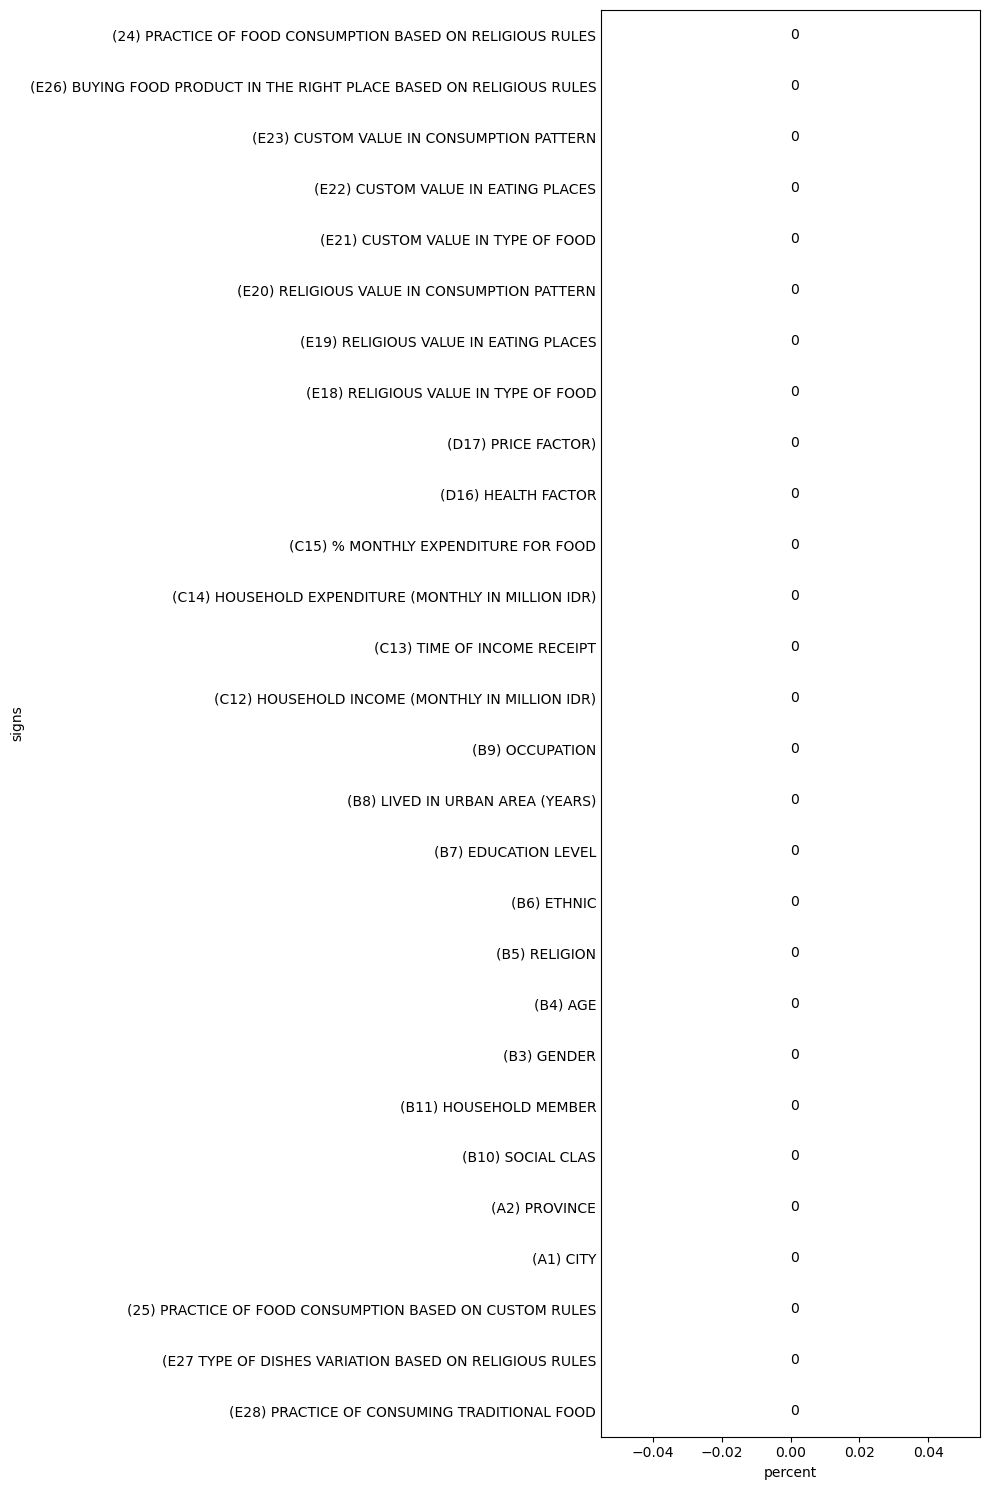

In [6]:
# Датафрейм для просмотра пустых значений
data_nan = pd.DataFrame()

columns = df.columns
data_nan.index = columns
data_nan['signs'] = columns
# Высчитываем процент пустых значений
data_nan['percent'] = round((df.isna().sum()/df.shape[0])*100, 0)

# Строим график
plt.figure(figsize=(10, 15))
ax = sns.barplot(data=data_nan, y='signs', x='percent', 
                 order=data_nan.groupby('signs')['percent'].agg('mean').sort_values(ascending=True).index )
ax.tick_params(axis='y', length=0)
for i in ax.containers:
    ax.bar_label(i,)
    
plt.tight_layout()
plt.show()

На графике можно увидеть признаки и процент и отсутсвия каких-либо пустых значений в графике 

__Также посмотрим корреляцию признаков.__

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 28 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   (A1) CITY                                                              710 non-null    object
 1   (A2) PROVINCE                                                          710 non-null    object
 2   (B3) GENDER                                                            710 non-null    object
 3   (B4) AGE                                                               710 non-null    int64 
 4   (B5) RELIGION                                                          710 non-null    object
 5   (B6) ETHNIC                                                            710 non-null    object
 6   (B7) EDUCATION LEVEL                                                   710 non-null    object
 7  

Далее нам необходимо определиться с зонами, которые покрывает Датасет и выбрать города для сравнения и проведения различий между ними в потребностях его жителей.

In [8]:
towns = df["(A1) CITY"].unique()

In [9]:
for i in towns:
    print("" + i + ": " + str(len(df[df["(A1) CITY"] == i]))  )

Jakarta: 174
Bandung: 150
Surabaya: 118
Makasar: 120
Denpasar: 148


Как видно из полученных данных - наибольшое количество данных находится в Jakarta и Bandung. В дальнейшей работе будет использован именно Jakarta.
Далее нам необходимо очистить датасет от остальных городов, что нам в дальнейшей работе не пригодятся.

In [10]:
mask1 = df['(A1) CITY'] == 'Jakarta'
mask2 = df['(A1) CITY'] == 'Bandung'

In [11]:
masked_df = df[ (df['(A1) CITY'] == 'Jakarta') | (df['(A1) CITY'] == 'Bandung')]

Далее, нам необходимо обновить индекс DataFrame, для корректной работы функций библиотек, по работе с данными.

In [12]:
masked_df.reset_index(drop=True,inplace=True)

__Теперь посмотрим на признаки со стороны логики.__

Можно оставить данные о Городе, в котором на данный момент рассматриваются данные как и характеристики самих людей и их состояния для дальнейшей кластеризации. Однако для дальнейшей работы нет большой нужды в :
 
 BUYING FOOD PRODUCT IN THE RIGHT PLACE BASED ON RELIGIOUS RULES
 
 TYPE OF DISHES VARIATION BASED ON RELIGIOUS RULES    
 
 PRACTICE OF FOOD CONSUMPTION BASED ON CUSTOM RULES 
 
 PRACTICE OF FOOD CONSUMPTION BASED ON RELIGIOUS RULES  
 
 ETHNIC 
 
 TIME OF INCOME RECEIPT
 
 CITY
Их нужно будет удалить

In [13]:
# Удаляем из скписака не нужные атрибуты
masked_df.drop(columns=['(24) PRACTICE OF FOOD CONSUMPTION BASED ON RELIGIOUS RULES', '(25) PRACTICE OF FOOD CONSUMPTION BASED ON CUSTOM RULES'],inplace=True)
masked_df.drop(columns=['(E27 TYPE OF DISHES VARIATION BASED ON RELIGIOUS RULES', '(E26) BUYING FOOD PRODUCT IN THE RIGHT PLACE BASED ON RELIGIOUS RULES'],inplace=True)
masked_df.drop(columns=['(B6) ETHNIC','(A2) PROVINCE','(C13) TIME OF INCOME RECEIPT','(A1) CITY'],inplace=True)

__Выделенные атрибуты.__

В итоге мы оставляем в выборке 33 признака, путём отбора принаков которые логичестки подходят под заданное условие, которые имееют достаточное количество данных, и так же которые не будут создавать помехи(из-за мультиколлинеарности) для класстеризаций.

In [14]:
print(len(list(masked_df)))
list(masked_df)

20


['(B3) GENDER',
 '(B4) AGE',
 '(B5) RELIGION',
 '(B7) EDUCATION LEVEL',
 '(B8) LIVED IN URBAN AREA (YEARS)',
 '(B9) OCCUPATION',
 '(B10) SOCIAL CLAS',
 '(B11) HOUSEHOLD MEMBER',
 '(C12) HOUSEHOLD INCOME (MONTHLY IN MILLION IDR)',
 '(C14) HOUSEHOLD EXPENDITURE (MONTHLY IN MILLION IDR)',
 '(C15) % MONTHLY EXPENDITURE FOR FOOD',
 '(D16) HEALTH FACTOR',
 '(D17) PRICE FACTOR)',
 '(E18) RELIGIOUS VALUE IN TYPE OF FOOD',
 '(E19) RELIGIOUS VALUE IN EATING PLACES',
 '(E20) RELIGIOUS VALUE IN CONSUMPTION PATTERN',
 '(E21) CUSTOM VALUE IN TYPE OF FOOD',
 '(E22) CUSTOM VALUE IN EATING PLACES',
 '(E23) CUSTOM VALUE IN CONSUMPTION PATTERN',
 '(E28) PRACTICE OF CONSUMING TRADITIONAL FOOD']

### 1.3 Описание структуры набора данных


#### Основные характеристики для аналитики

__(B3) GENDER__	Пол потребителя и общее количество людей этого пола, вместе и его влияние на потребляемую пищу

__(B4) AGE__	Возраст клиента, что сказывается на многих из его предпочтений и его возможностей.

__(B5) RELIGION__	Религия клиента, что сказывается на многих из его предпочтений и его возможностей для потребления.


__(B7) EDUCATION LEVEL__	Уровень образования клиента

__(B8) LIVED IN URBAN AREA (YEARS)__	Проживание в городской местности по времени, на протяжении каких-либо промежутков временных.

__(B9) OCCUPATION__	То, какую деятельность ведёт клиент и государстве и коим образом зарабатывает на собственные нужды.

__(B10) SOCIAL CLAS__	НКласс, в котором находится клиент по собственному достатку.

#### Характеристики целевой аудитории

__(B11) HOUSEHOLD MEMBER__	Количество членов семьи, которые фактически являются потенциальными клиентами для компании.

__(C12) HOUSEHOLD INCOME (MONTHLY IN MILLION IDR)__	Прибыль месячная семьи. Фактически - это является бюджетом, что доступен семье клиента, что он будет в том или ином смысле использовать и доступно это для них.

__(C14) HOUSEHOLD EXPENDITURE (MONTHLY IN MILLION IDR)__	Общие траты клиента. По сути - это наше целевое направление, ибо наша цель - увеличить траты клиента на нашу кампанию, однако здесь не полностью имеется возможноность увеличивать траты клиента, ибо они не только вкладываются в траты на еду.

__(C15) % MONTHLY EXPENDITURE FOR FOOD__	Это уже полностью наши целевые траты, которые мы стремимся перетянуть на себя, путем угождения наибольшему количеству людей, для привлечения их денежных ресурсов в нашу сторону

__(D16) HEALTH FACTOR__	Насколько клиенты ориентируются на собственное здоровье, при выборе услуг и продуктов, которые он будет приобретать в дальнейшем

__(D17) PRICE FACTOR__	Насколько сильно клиент ориентируется на цену, при приобретении продуктов для дальнейшего потребления.

#### Особенности потребления в культуре

__(E18) RELIGIOUS VALUE IN TYPE OF FOOD__	То, насколько клиент полагается на свои религиозные ценности при выборе типа еды для приобретения

__(E19) RELIGIOUS VALUE IN EATING PLACES__	То, насколько клиент полагается на свои религиозные ценности при выборе места потребления еды

__(E20) RELIGIOUS VALUE IN CONSUMPTION PATTERN__	То, насколько клиент полагается на свои религиозные ценности при определении паттернов в потреблении еды.(Определенные продукты в определенное время и т.п.)

__(E21) CUSTOM VALUE IN TYPE OF FOOD__	То, насколько клиент полагается на свои ценности при определении типа потреблении еды.

__(E22) CUSTOM VALUE IN EATING PLACES__	То, насколько клиент полагается на свои ценности при определении типа места для потреблении еды.


__(E23) CUSTOM VALUE IN CONSUMPTION PATTERN__	То, насколько клиент полагается на свои ценности при определении паттернов в потреблении еды.(Определенные продукты в определенное время и т.п.)

__(E28) PRACTICE OF CONSUMING TRADITIONAL FOOD__	То, насколько клиент полагается на свои практики при  потреблении традиционной еды.


Многие признаки относятся к культурным характеристикам тестируемых людей

__Распределение плотности__

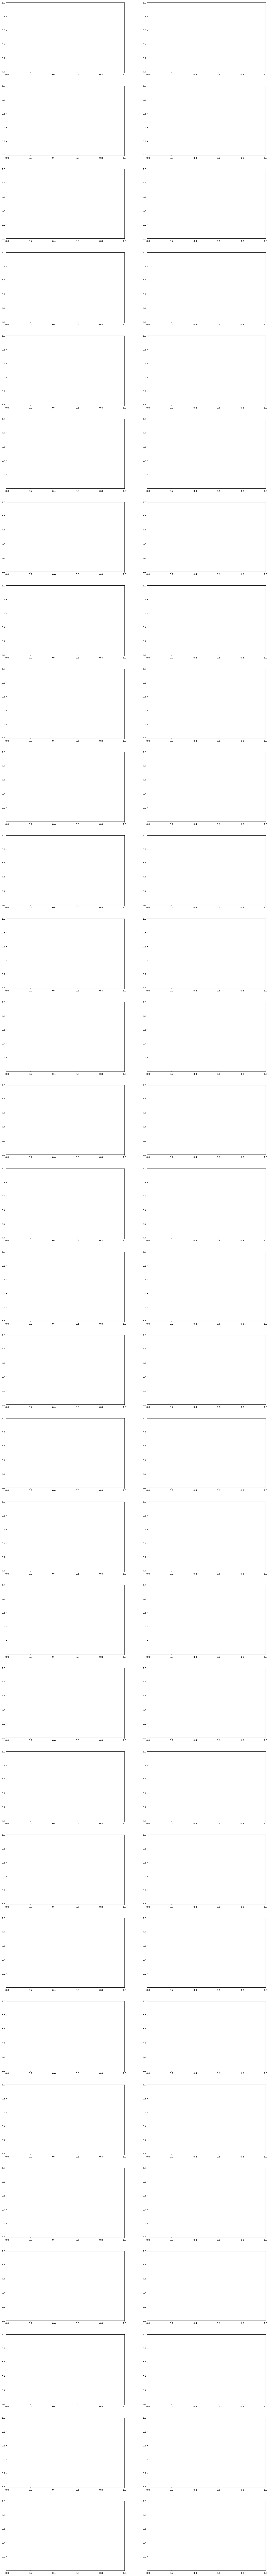

In [16]:
# Создаем матрицу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(31,2, figsize = (20,200))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Список значений признаков для цикла
columns = masked_df.columns
# Отбираем столбы с типом floate
columns = list(columns[4:])
columns.remove(columns[29])

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = df,
                x = column,
                fill = True,
                alpha = 0.8,
                ax = ax)
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Плотность', fontsize = 14)
    
plt.show()

По данным распределениям можно сделать следующий вывод:
    
    Почти все признаки не имеют нормального распределения.

    В основном их значения имеют экстремум на минимальных значениях, из этого можно сделать вывод, что есть много признаков в которых содержаться выбросы.

    Также имеются признаки в которых два экстремума total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred.

    Также распространённое распределение находится в stringency_index, median_age, male_smokers, handwashing_facilitues.

    Так как распределение ненормальное в дальнейшем необходимо масштабировать данные, а именно нормализовать. После чего избавиться от выбросов, там где это нужно.

### 1.4 Формирование дополнительных атрибутов

Сформируйте отдельный атрибут, в которых будет содержаться анализ распространения вируса
с помощью коэффициента распространения инфекции (Rt = число зарегистрированных
заболеваний за последние 4 дня / число зарегистрированных заболеваний за предыдущие 4
дня). Пример вычисления коэффициента RT приведен на портале: https://gogov.ru/articles/covidrt. Проанализируйте возможность определения изменения эпидемиологической ситуации,
используя сформированный атрибут.

После просмотра данных по всей выборке, можно начать её подготовку к обучению. Начнём с записи столбцов для выборки в главный dataframe.

In [ ]:
df = df[need_signs]

In [ ]:
# Преобразовываем столбец даты из строки в тип datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.head()

In [ ]:
df.info()

Теперь в выборке содержится 31 признака, есть данные с типом datetime, 29 колонка с типом float64, и один признак строковый - location.

In [ ]:
# отсортируем значения для простоты
df.sort_values(by=['location', 'date'])
df

Для начала __просмотрим города__, возможно есть места, где данных слишком мало.

In [ ]:
df['location'].value_counts().sort_values()

In [ ]:
df[df['location'] == 'Western Sahara']

Можно заметить что по 'Western Sahara' всего она запись, её можем удалить, она не даст нам возможности понять, опасно ли находится там.

In [ ]:
# Удаляем строку
df = df[df['location'] != 'Western Sahara']

In [ ]:
df[df['location'] == 'Western Sahara']

Проверка __пустых значений__ в первых главных для нас столбцах total_cases, new_case, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed - столбцам связанных с заражением.

In [ ]:
# df[(df['new_cases'].isna()) & (df['total_cases'].isna()) & (df['total_deaths'].isna()) & (df['new_deaths'].isna())]
df[(df['new_cases'].isna()) & (df['total_cases'].isna())]

Можно увидеть, что в данных столбцах total_cases и new_cases оба равны NaN, но так же в этих строках не заполнены и другие данные связанные с заражением, вероятнее всего это из-за того, что эти данные были удалены либо не добавленны на сайты, от куда парсились. Следовательно эти строки можно просто удалить и не гадать какие должны были быть данные.

In [ ]:
present = round(df[(df['new_cases'].isna()) & (df['total_cases'].isna())].shape[0]/df.shape[0]*100, 1)
print(f'Процент удаляемых строк: {present}')

Процент не превышает 5, поэтому можем спокойно удалять строки.

In [ ]:
# Удаляем строки по индексу
index_names = df[(df['new_cases'].isna()) & (df['total_cases'].isna())].index 
df.drop(index_names, inplace = True) 

In [ ]:
df[(df['new_cases'].isna()) & (df['total_cases'].isna())]

Так же можно удалить данные строки, берём перый месяц, т.к. там ещё не было заражения.

In [ ]:
df[(df['new_cases_smoothed'].isna()) & (df['total_cases'].isna()) & (df['new_cases']==0) 
   & (df['date'].dt.year == 2020) & (df['date'].dt.month == 1) ]

In [ ]:
# Удаляем строки по индексу
index_names = df[(df['new_cases_smoothed'].isna()) & (df['total_cases'].isna()) & (df['new_cases']==0) 
   & (df['date'].dt.year == 2020) & (df['date'].dt.month == 1) ].index 
df.drop(index_names, inplace = True) 

In [ ]:
df[(df['new_cases_smoothed'].isna()) & (df['total_cases'].isna()) & (df['new_cases']==0) 
   & (df['date'].dt.year == 2020) & (df['date'].dt.month == 1) ]

В итоге строки с незаполнеными данными удалили, что упростит дальнейший анализ и заполнение пустых значений.

Далее заменим Nan значения в new_cases и new_deaths на 0, так как будем предпологать, в этот день не было информаций о заражениях.

In [ ]:
df['new_cases'].fillna(0, inplace=True)
df['new_deaths'].fillna(0, inplace=True)

In [ ]:
df[(df['new_cases'].isna())]

In [ ]:
df[(df['new_deaths'].isna())]

Заполнение прошло успешно, теперь можно заполнить total_cases и total_deaths на оснований данных new_cases и new_deaths , т.к. они равны сумме всех new_cases/new_deaths до даты данной строки.

In [ ]:
for location, group in df.groupby('location'):
    sum_c= 0
    sum_d= 0
#     берём индекс и строку
    for index, row in group.iterrows():
        sum_c += row['new_cases']
        sum_d += row['new_deaths']
        df.loc[index, 'total_cases'] = sum_c
        df.loc[index, 'total_deaths'] = sum_d

In [ ]:
df[df['total_cases'].isna()]

In [ ]:
df[df['total_deaths'].isna()]

Пустых значений в total_cases и total_deaths не осталось. Дальше идём по списку и просмотрим new_cases_smoothed и new_deaths_smoothed. Тут два варианта: удалим строки с пустыми значениями, если их немного или вычислим сумму new_cases/new_deaths за неделю на определённой местности и разделить это значение на 7.

In [ ]:
df[(df['new_deaths_smoothed'].isna()) | (df['new_cases_smoothed'].isna())]

Видно, что строк меньше 1000, на выборку они повлияют несильно, но зато упростят нам работу.

In [ ]:
# Удаляем строки по индексу
index_names =df[(df['new_deaths_smoothed'].isna()) | (df['new_cases_smoothed'].isna())].index 
df.drop(index_names, inplace = True) 

In [ ]:
df[(df['new_deaths_smoothed'].isna()) | (df['new_cases_smoothed'].isna())]

In [ ]:
data_nan = pd.DataFrame()

columns = df.columns
data_nan.index = columns
# Высчитываем процент пустых значений
data_nan['percent'] = round((df.isna().sum()/df.shape[0])*100, 0)

data_nan[data_nan['percent'] > 0]

Далее заполним значения __total_cases_per_million, total_deaths_per_million__

In [ ]:
df[(df['total_cases_per_million'] > 0) & (df['total_deaths_per_million'] > 0)].head(5)

Проанализировав данные можно сделать вывод, что total_cases_per_million равен total_cases делённое на population/1000000, total_deaths_per_million равен total_deaths делённое на population/1000000

In [ ]:
df['total_cases_per_million'].fillna(round(df['total_cases']/(df['population']/1000000), 4), inplace=True  )
df['total_deaths_per_million'].fillna(round(df['total_deaths']/(df['population']/1000000), 4), inplace=True  )

In [ ]:
print(f"Количество пустых значений \n\ttotal_cases_per_million: {df[df['total_cases_per_million'].isna()].shape[0]}\n\ttotal_deaths_per_million: {df[df['total_deaths_per_million'].isna()].shape[0]}")

In [ ]:
df[(df['total_cases_per_million'] == 0) & (df['total_cases'] != 0) & (df['population'] != 0)]

Есть некоторые строки где total_cases_per_million равен 0, но этого из-за слишком маленького значения.

Столбец reproduction_rate удалим, так как по заданию нам нужно создать свой столбец коэффициента распространения covid.

In [ ]:
df.drop(columns=['reproduction_rate'], inplace=True)

Так же необходимо удалить столбец new_people_vaccinated_smoothed_per_hundred, new_vaccinations_smoothed_per_million, так как не факт, что вакцинация будет влиять на кластеры, и у нас уже есть общие цифры.

In [ ]:
df.drop(columns=['new_people_vaccinated_smoothed_per_hundred'], inplace=True)
df.drop(columns=['new_vaccinations_smoothed_per_million'], inplace=True)

In [ ]:
df.head()

Далее заполним new_vaccinations_smoothed new_people_vaccinated_smoothed нулями, так как будем предпологать, что вакцин на то время не делали.

In [ ]:
df['new_vaccinations_smoothed'].fillna(0, inplace=True)
df['new_people_vaccinated_smoothed'].fillna(0, inplace=True)
print(f"Количество пустых значений \n\tnew_vaccinations_smoothed: {df[df['new_vaccinations_smoothed'].isna()].shape[0]}\n\tnew_people_vaccinated_smoothed: {df[df['new_people_vaccinated_smoothed'].isna()].shape[0]}")

Теперь с помощью группировки необходимо заполнить пустые значения в stringency_index.

Далее оставшиеся колонки заполним средними значениями по локации за год, есть шанс, что таких значений не будет, поэтому заменим их на обычную медиану.

In [ ]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [ ]:
columns_ = list(df.columns)[16:]
columns_

In [ ]:
str_ = ''
for i in columns_:
    indx_loc = df.groupby(['location', 'year'])[i].transform('median')
    df[i].fillna(indx_loc, inplace=True)
    if (df[i].isna().sum() > 0):
        df[i].fillna(df[i].median(), inplace=True)
    str_ += i + ' - ' + str(df[i].isna().sum()) + f'\n'
print('Количество пустых значений:'+ f'\n' + str_)

In [ ]:
# вывод процента значений больше 0
data_nan['percent'] = round((df.isna().sum()/df.shape[0])*100, 0)
data_nan[data_nan['percent'] > 0]

Таким образом мы заменили остальные пустые значения в столбцах.

Теперь добавим новый признак RT.

In [ ]:
df['RT'] = 0

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
# Функция которая возращает двумерный список: 4 прошлых дня и 4 позапрошлых дня
def fun_date(date_):
    lst_n4 = []
    lst_l4 = []
    for i in range(0, 4):
        lst_n4.append(date_ - datetime.timedelta(days = i))
    for i in range(3, 8):
         lst_l4.append(date_ - datetime.timedelta(days = i))
    return [lst_n4, lst_l4]
        

df_loc = df.groupby('location')

for i in set(df['location'].tolist()):
    df_i = df_loc.get_group(i)
    for index, row in df_i.iterrows():
        lst_d = fun_date(row['date'])
        n4 = df_i[df_i['date'].isin(lst_d[0])]['new_cases'].sum()
        l4 = df_i[df_i['date'].isin(lst_d[1])]['new_cases'].sum()
        if (l4 != 0 & pd.notnull(l4)):
            df.loc[index, 'RT']=round(n4/l4, 3)
            

In [ ]:
df[(df['new_cases'] >0) & (df['location'] == 'Congo')].head(30)

In [ ]:
df['RT'].isna().sum()

С помощью алгоритма мы заполнили признак RT, пустые значения отсутвуют, если посмтореть на Congo то можно увидеть что всё заполнилось корректно.

### 1.5 Кластеризация набора данных

#### Отбор выборки объектов для кластеризации.

In [ ]:
['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed'
,'total_cases_per_million'         
,'total_deaths_per_million'           
,'new_vaccinations_smoothed'     
,'new_people_vaccinated_smoothed'     
,'stringency_index'     
,'population_density'     
,'median_age'                              
,'human_development_index'    
,'population'           
,'RT']

In [ ]:
X = df[['total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed'
,'total_cases_per_million'         
,'total_deaths_per_million'             
,'population'           
,'RT']]
columns = X.columns

In [ ]:
X.info()

Будем использовать столбцы, которые свзяны непосредственно с заражением. Иначе при большем количестве столбцов есть шанс, что кластеры будут больше опираться на другие признаки.

#### Масштабирование

Проведём нормализцию, так как в пункте 1.3 было видно, что данные распределены ненормально.

In [ ]:
X[columns] = mms.fit_transform(X[columns])
X.head()

In [ ]:
X.describe().T

Нормализация проведена успешно, минимальное значение везде равно 0, а максимальное 1.

#### Определение количества кластеров

Будем использовать метод ближайших соседей, так как выборка слишком большая, метод иерархической кластеризации не подойдёт.

In [ ]:
kmean_set = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
inertia_list = []

for k in range(1, 11):   
    kmeans = KMeans(n_clusters=k, **kmean_set)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) 

plt.plot(range(1, 11), inertia_list)  # Corrected variable name
plt.xticks(range(1, 11))
plt.xlabel("Количество кластеров")
plt.show()


По методу локтя видно, что наилучшее количество кластеров равно трём, ну и так как по заданию необходимы три кластера именно это количество мы и будем использовать.

Далее возьмём три метода кластеризаций, которые подойдут для нашей достаточно большой выборки: KMeans, Birch и Gaussian Mixture Model. Иерархические модели нам не подходят, так как они предназначены для более маленьких выборок.

### KMeans

In [ ]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

In [ ]:
len(labels)

In [ ]:
X.shape

In [ ]:
# Assuming you already have labels and centroids from the KMeans clustering
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Scatter plot of the clustered data points
plt.figure(figsize=(8, 6))
for i in range(len(set(labels))):
    plt.scatter(X.iloc[labels == i, 2], X.iloc[labels == i, 0], label=f'Cluster {i + 1}')

# Scatter plot of the cluster centroids
plt.scatter(centroids[:, 2], centroids[:, 0], marker='X', s=200, color='red', label='Centroids')


plt.title('K-Means Clustering')

plt.legend()
plt.show()


Видим, что центроиды кластеров находятся, почти на одном месте, так же есть какие то выбросы. Оценим кластеризацию с помощью метрик.

Оценим кластеры метриками: davies_bouldin_score(чем меньше тем лучше), silhouette_score(чем больше тем лучше), calinski_harabasz_score(чем больше тем лучше).

In [ ]:
davies1 = davies_bouldin_score(X, labels)
davies1

In [ ]:
score1 = silhouette_score(X, kmeans.labels_, 
                metric='euclidean', sample_size=len(X))
score1

In [ ]:
calinski1 = calinski_harabasz_score(X, labels)
calinski1

Оценка на самом деле плохая, как будто кластеры проставлены наугад, но нужно просмотреть значения из dataframe.

In [ ]:
X_look = df[columns]
X_look['date'] = df['date']
X_look['location'] = df['location']

In [ ]:
X_look['cluster'] = labels

In [ ]:
X_look.shape

In [ ]:
print(X_look[X_look['cluster'] == 0].shape)
X_look[X_look['cluster'] == 0].head(10)

In [ ]:
print(X_look[X_look['cluster'] == 1].shape)
X_look[X_look['cluster'] == 1].head(10)

In [ ]:
print(X_look[X_look['cluster'] == 2].shape)
X_look[X_look['cluster'] == 2].head(10)

Просмотрев значения, можно сделать вывод:

__Кластер 0__: безопасное нахождение, имеет меньшие значения заражения, 251087 значений;

__Кластер 1__: небезопасное нахождение, имеет средние значения заражения, 71495 значений;

__Кластер 2__: опасность нахождения, имеет сильное заражения и смертность, 42294 значений.

Оценка силуэта метрики 0.68, достаточно мало, так же можно увидеть, что центроиды кластеров находятся практически друг на друге, и значения кластеров расскиданы не правильно.

### Birch

In [ ]:
# Уменьшение размерности датафрейма до 2-х измерений

pca = PCA(n_components=2)
pca.fit(X)

x_pca = pca.transform(X)
np.shape(x_pca)

In [ ]:
# Получение распределения от Birch


brc = Birch(threshold=0.01, n_clusters=3)
brc.fit(x_pca)

yhat_br = brc.predict(x_pca)
cluster_brc = pd.unique(yhat_br)
print('Кластеры метода Birch:',cluster_brc )
labels2 = brc.labels_

In [ ]:
# Просмотр того, как распределились данные 
label = pd.Series(yhat_br)
label.value_counts()

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=yhat_br,cmap='rainbow', alpha=0.8)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Данная интерпретация кластеров выглядит лучше, хотя смучает, что значения кластеров распределены неравномерно, где-то больше, где-то меньше.

Оценим кластеры метриками: davies_bouldin_score(чем меньше тем лучше), silhouette_score(чем больше тем лучше), calinski_harabasz_score(чем больше тем лучше).

In [ ]:
score2 = silhouette_score(X, labels2, metric='euclidean', sample_size=len(X))
score2

In [ ]:
davies2 = davies_bouldin_score(X, labels2)
davies2

In [ ]:
calinski2 = calinski_harabasz_score(X, labels2)
calinski2

Оценка лучше, чем у прошлого метода, но до сих пор храмает.

In [ ]:
X_look['cluster2'] = labels2

In [ ]:
print(X_look[X_look['cluster2'] == 0].shape)
X_look[X_look['cluster2'] == 0].head(10)

In [ ]:
print(X_look[X_look['cluster2'] == 1].shape)
X_look[X_look['cluster2'] == 1].head(10)

In [ ]:
print(X_look[X_look['cluster2'] == 2].shape)
X_look[X_look['cluster2'] == 2].head(10)

Просмотрев значения, можно сделать вывод:

__Кластер 0__: средняя опасность нахождения, имеет среднее заражения и большую смертность, 44097 значений;

__Кластер 1__: безопасное нахождение, имеет меньшие значения заражения, 298497 значений;

__Кластер 2__:  опасность нахождения, имеет опасное заражение и смертность, 22282 значений.

Хоть оценка метрики 0.75 и значения в кластерах соответвуют распределению на кластеры, они распределились неравномерно и получилось так, что в "опасной зоне" находится 2000 значений, а в "безопасной зоне" 300 тысяч значений.

### Gaussian Mixture Model

In [ ]:
# Получение распределения от GaussianMixture

gmm = GaussianMixture(3, covariance_type='tied', random_state=33).fit(x_pca)

labels3 = gmm.predict(x_pca)

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels3,cmap='rainbow', alpha=0.4)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Использовали в гаусовском методе covariance_type='tied', и имеем вполне логичное расспрделение.

In [ ]:
labels3 = pd.Series(labels3)
labels3.value_counts()

Оценим кластеры метриками: davies_bouldin_score(чем меньше тем лучше), silhouette_score(чем больше тем лучше), calinski_harabasz_score(чем больше тем лучше).

In [ ]:
score3 = silhouette_score(X, labels3, 
                metric='euclidean')
score3

In [ ]:
davies3 = davies_bouldin_score(X, labels3)
davies3

In [ ]:
calinski3 = calinski_harabasz_score(X, labels3)
calinski3

Оценка в разы хуже, чем у прошлых методов кластеризаций.

In [ ]:
X_look['cluster3'] = labels3

In [ ]:
print(X_look[X_look['cluster3'] == 0].shape)
X_look[X_look['cluster3'] == 0].head(10)

In [ ]:
print(X_look[X_look['cluster3'] == 1].shape)
X_look[X_look['cluster3'] == 1].head(10)

In [ ]:
print(X_look[X_look['cluster3'] == 2].shape)
X_look[X_look['cluster3'] == 2].head(10)

Просмотрев значения, можно сделать вывод:

__Кластер 0__: безопасное нахождение (в основном заражения и смертность на 0), имеет меньшие значения заражения, 272870 значений;

__Кластер 1__: небезопасное нахождение (в основном заражения на 1000 за неделю), имеет меньшие значения заражения, 55957 значений;

__Кластер 2__: опасность нахождения (заражение на неделю в районе 3000), имеет среднее заражения и смертность, 36049 значений.

Итого гаусовский метод имеют силуэт метрики: 0.69, кластеры так же распределены в непропорциональном количестве, но значения вполне логичные.

#### Метрики кластеризаций

Сравним метрики, чтобы выбрать лучший метод кластеризаций для выборки.

In [ ]:
# Создание списка со значениями метрик
metric_values = [score1, score2, score3]

# Создание списка с названиями алгоритмов
alg_names = ['K-means', 'Birch', 'GaussianMixture']

# Построение столбчатой диаграммы
plt.bar(alg_names, metric_values)

# Добавление заголовка и меток осей
plt.title('Оценка метрик кластеризации')
plt.ylabel('Оценка метрики Silhouette - Score')

# Показать график
plt.show()

Силуэтная метрика вызывает больше всего доверия, и можно увидеть, что лучшие модели здесь будут K-means и Birch.

In [ ]:
# Создание списка со значениями метрик
metric_values = [davies1, davies2, davies3]

# Создание списка с названиями алгоритмов
alg_names = ['K-means', 'Birch', 'GaussianMixture']

# Построение столбчатой диаграммы
plt.bar(alg_names, metric_values)

# Добавление заголовка и меток осей
plt.title('Оценка метрик кластеризации')
plt.ylabel('Оценка метрики davies - bouldin')

# Показать график
plt.show()

В данной метрике, чем ниже значение, тем лучше модель, из этого делает вывод что Birch выигрывает.

In [ ]:
# Создание списка со значениями метрик
metric_values = [calinski1, calinski2, calinski3]

# Создание списка с названиями алгоритмов
alg_names = ['K-means', 'Birch', 'GaussianMixture']

# Построение столбчатой диаграммы
plt.bar(alg_names, metric_values)

# Добавление заголовка и меток осей
plt.title('Оценка метрик кластеризации')
plt.ylabel('Оценка метрики calinski - harabasz')

# Показать график
plt.show()

В данном случае, K-means является лучшей моделью, НО в прошлых критериях она сильно проигрывала, и распределение этих кластеров, сильно не равномерное, поэтому будем считатть лучшей молью Birch.

#### Лучшая модель - Birch

В итоге самой лучшей моделью, оказалась модель Birch, она имеет лучший метрику в 0.75, центроиды в ней распределены на нормальном расстроянии, в отличии от KMeans, к сожалению, в ней неравномерно распредены значения в кластерах, но такая же ситуация и с остальными моделями.

Запишем столбец с уровнем опасности по кластерам модели Birch.

In [ ]:
clus = {0: 'средняя', 1: 'безопасно', 2: 'опасно'}
df['hazard_level'] = X_look['cluster2'].map(clus)

In [ ]:
df.sample(15)

In [ ]:
# Записываем df в файл
df.to_csv(r'result_1.csv', index=False, encoding='utf-8')

### 1.6 Подготовка отчета

### Вывод

__1.1 Парсинг данных__

Для начала спарсили данные с а owid-covid-data.csv репозитория https://github.com/owid, и построили по ним датасет. Просмотрели все атрибуты.

__1.2 Предобработка данных и выделение значимых атрибутов__

Определились с нужными для выборки атрибутами. Использовали такие параметры как пропущенные значения и корреляцию.

__1.3  Описание структуры набора данных__

Прописали описание всех атрибутов. Проанализировали сам датасет на нормальность, и увидели, что распределение не являться нормальным, поэтому далее нормализовали выборку.

__1.4 Формирование дополнительных атрибутов__

Убрали не нужные атрибуты по п. 1.2. Добали атрибут для оценки распространения болезни, с помощью алгоритма, вычисляя значения по формуле.

__1.5 Кластеризация набора данных__

Нормализовали выборку и оставили нужные атрибуты. Определили кластеры - группы опасности, нахождения в то или иное время в стране(городе), лучшей моделью оказалась модель Birch. 

__1.6 Подготовка отчета__

Создали отчёт Report.html + Report.ipynb и файл Readme.txt, записали всё в Data.zip.